In [1]:
# Install required packages
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
# Import libs
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Roboflow project setup and dataset download
rf = Roboflow(api_key="vkn5JvocSSwADTJG87VP")
project = rf.workspace("-jwzpw").project("continuous_fire")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:00<00:00, 6636.49it/s]


In [4]:
# Overwrite the YAML config for training
%%writefile /content/continuous_fire-6/data.yaml
names:
- fire
nc: 1
roboflow:
  license: CC BY 4.0
  project: continuous_fire
  url: https://universe.roboflow.com/-jwzpw/continuous_fire/dataset/6
  version: 6
  workspace: -jwzpw
test: /content/continuous_fire-6/test/images
train: /content/continuous_fire-6/train/images
val: /content/continuous_fire-6/valid/images

Overwriting /content/continuous_fire-6/data.yaml


In [5]:
# Train YOLOv8 model
!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire-6/data.yaml epochs=20 imgsz=640 plots=True

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/continuous_fire-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

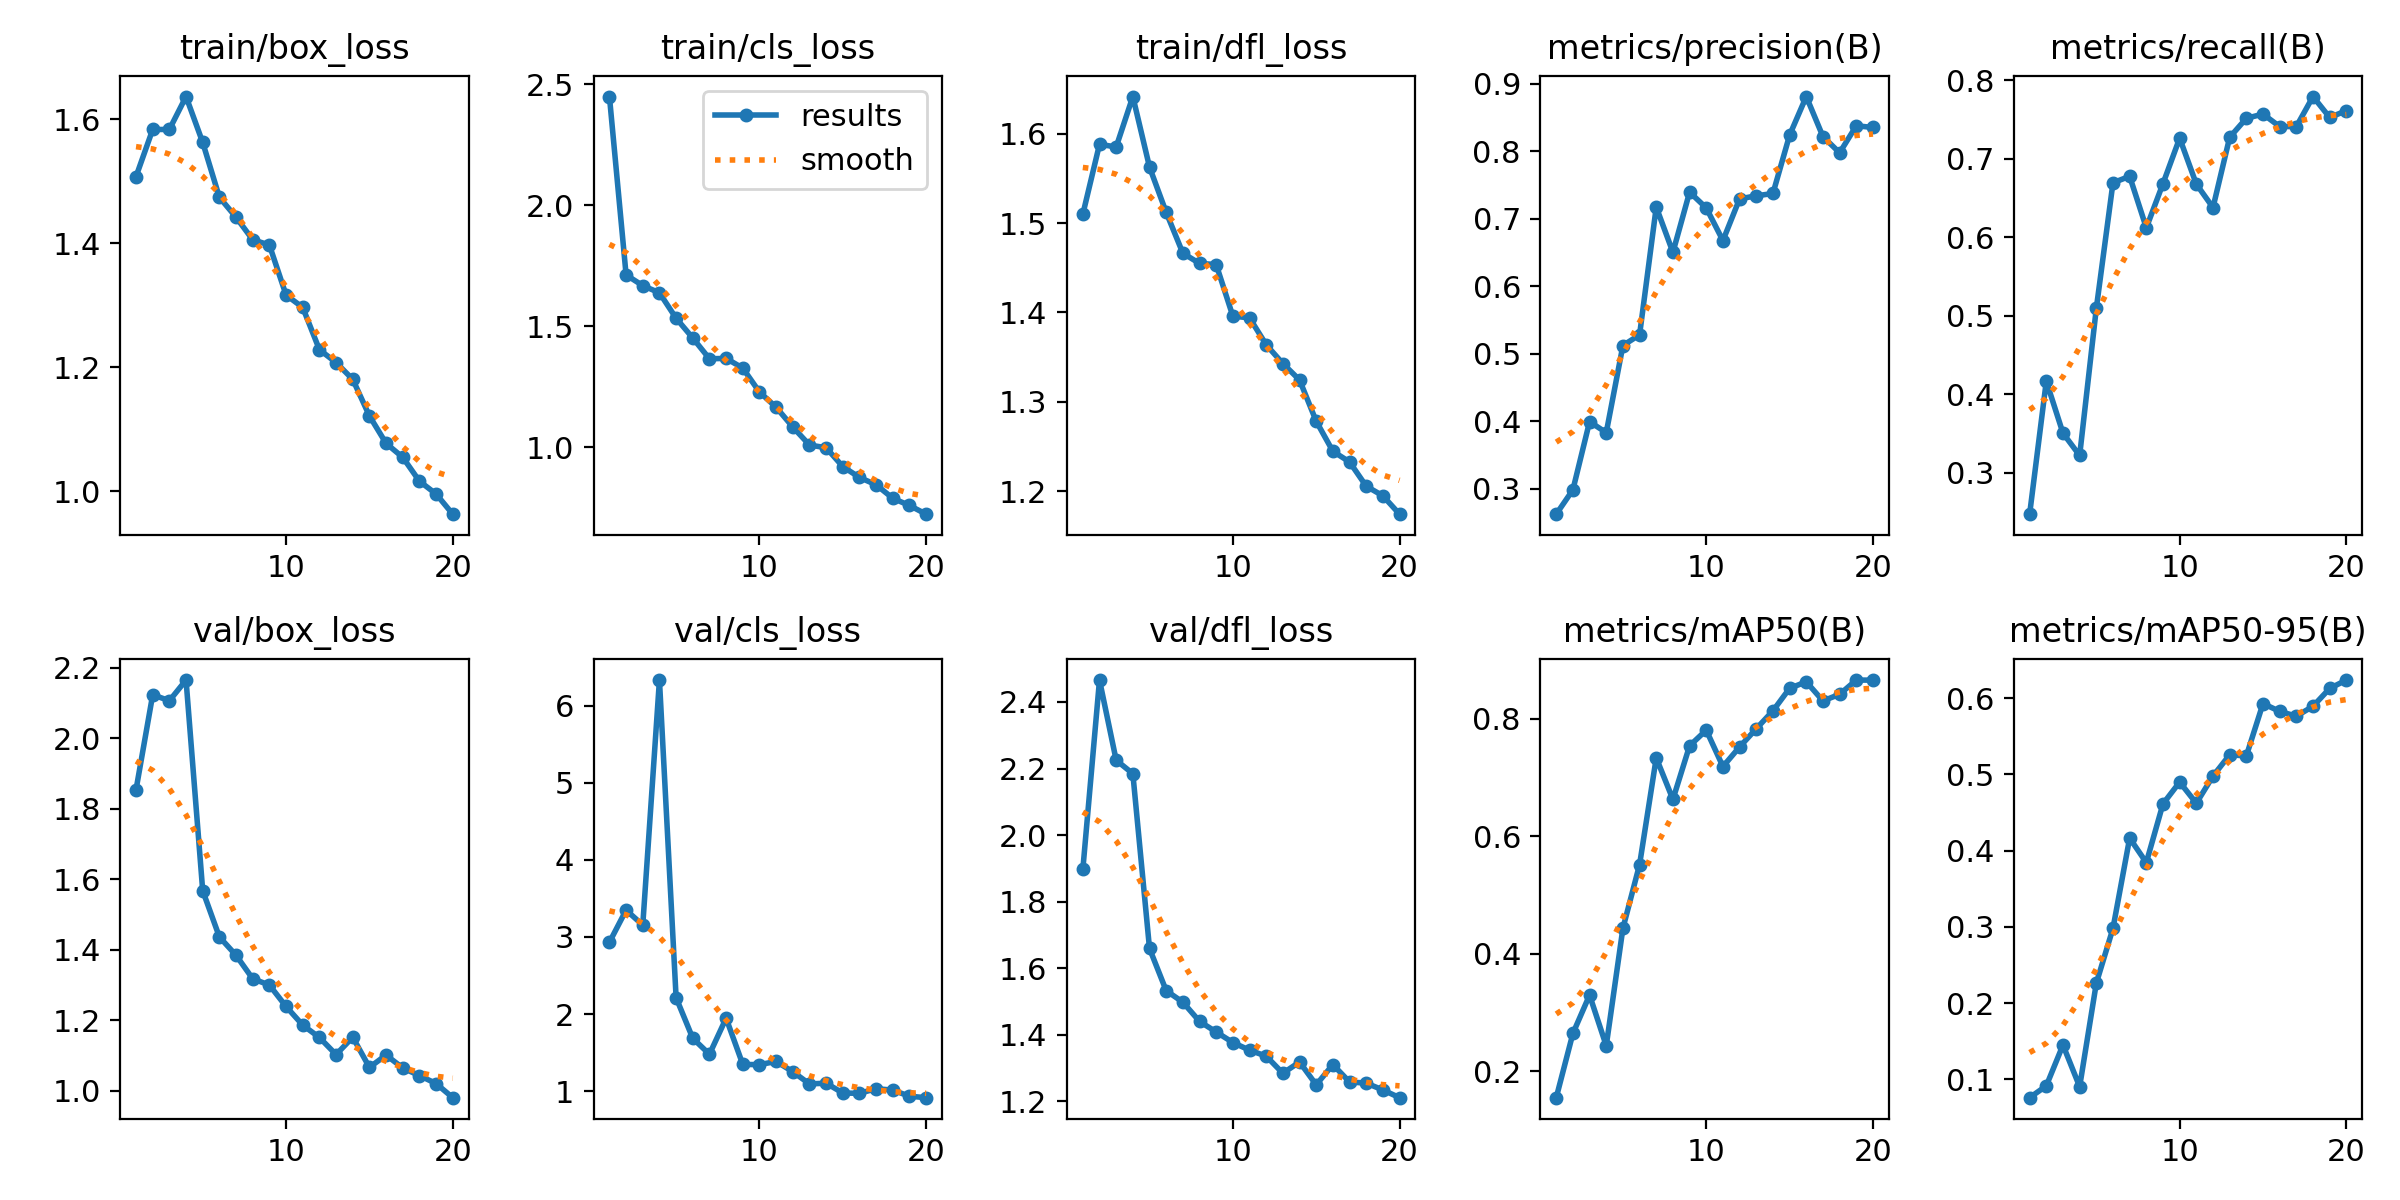

In [6]:
# Show training result plots
Image(filename='/content/runs/detect/train/results.png', width=600)

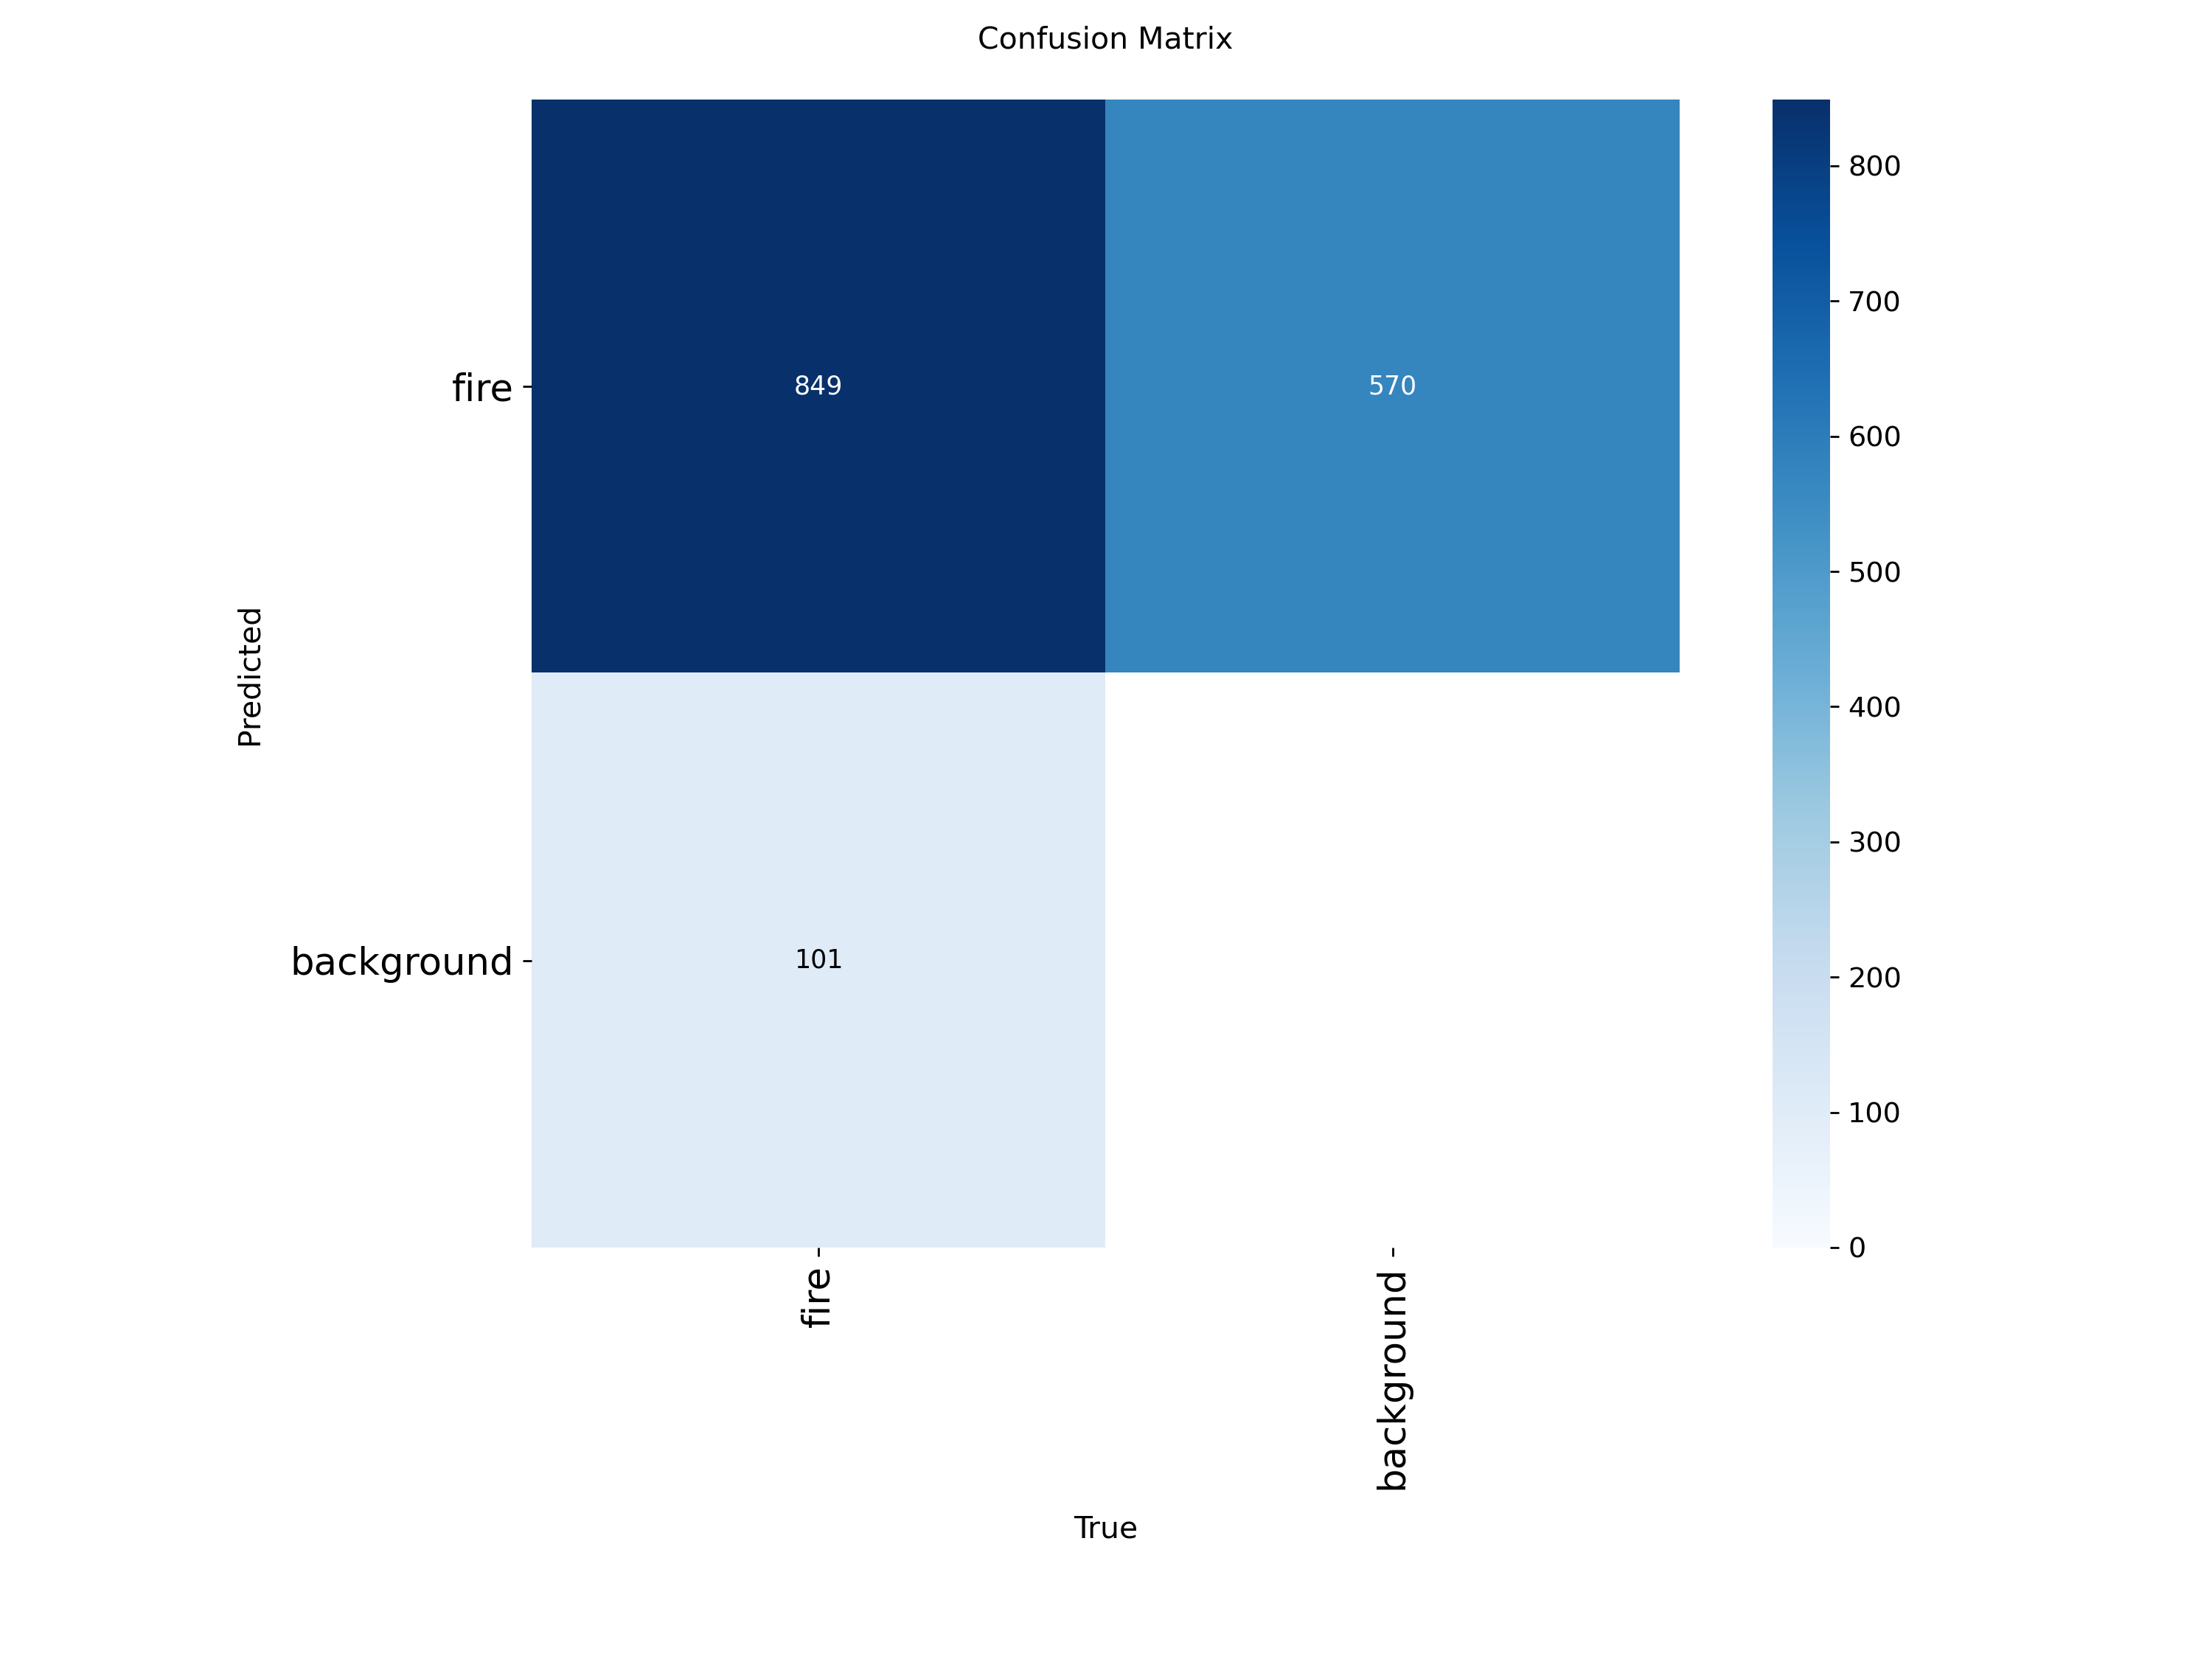

In [7]:
# Confusion Matrix
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

In [8]:
# Run validation after training
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/continuous_fire-6/data.yaml

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 588.5±153.8 MB/s, size: 9.3 KB)
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:10<00:00,  4.40it/s]
                   all        754        950      0.835      0.761      0.865      0.624
Speed: 0.7ms preprocess, 8.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Saving pexels-vladbagacian-1061640.jpg to pexels-vladbagacian-1061640.jpg

image 1/1 /content/pexels-vladbagacian-1061640.jpg: 448x640 1 fire, 13.8ms
Speed: 3.1ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
Pasta de saída dos resultados: runs/detect/predict3
Arquivos gerados: ['pexels-vladbagacian-1061640.jpg']


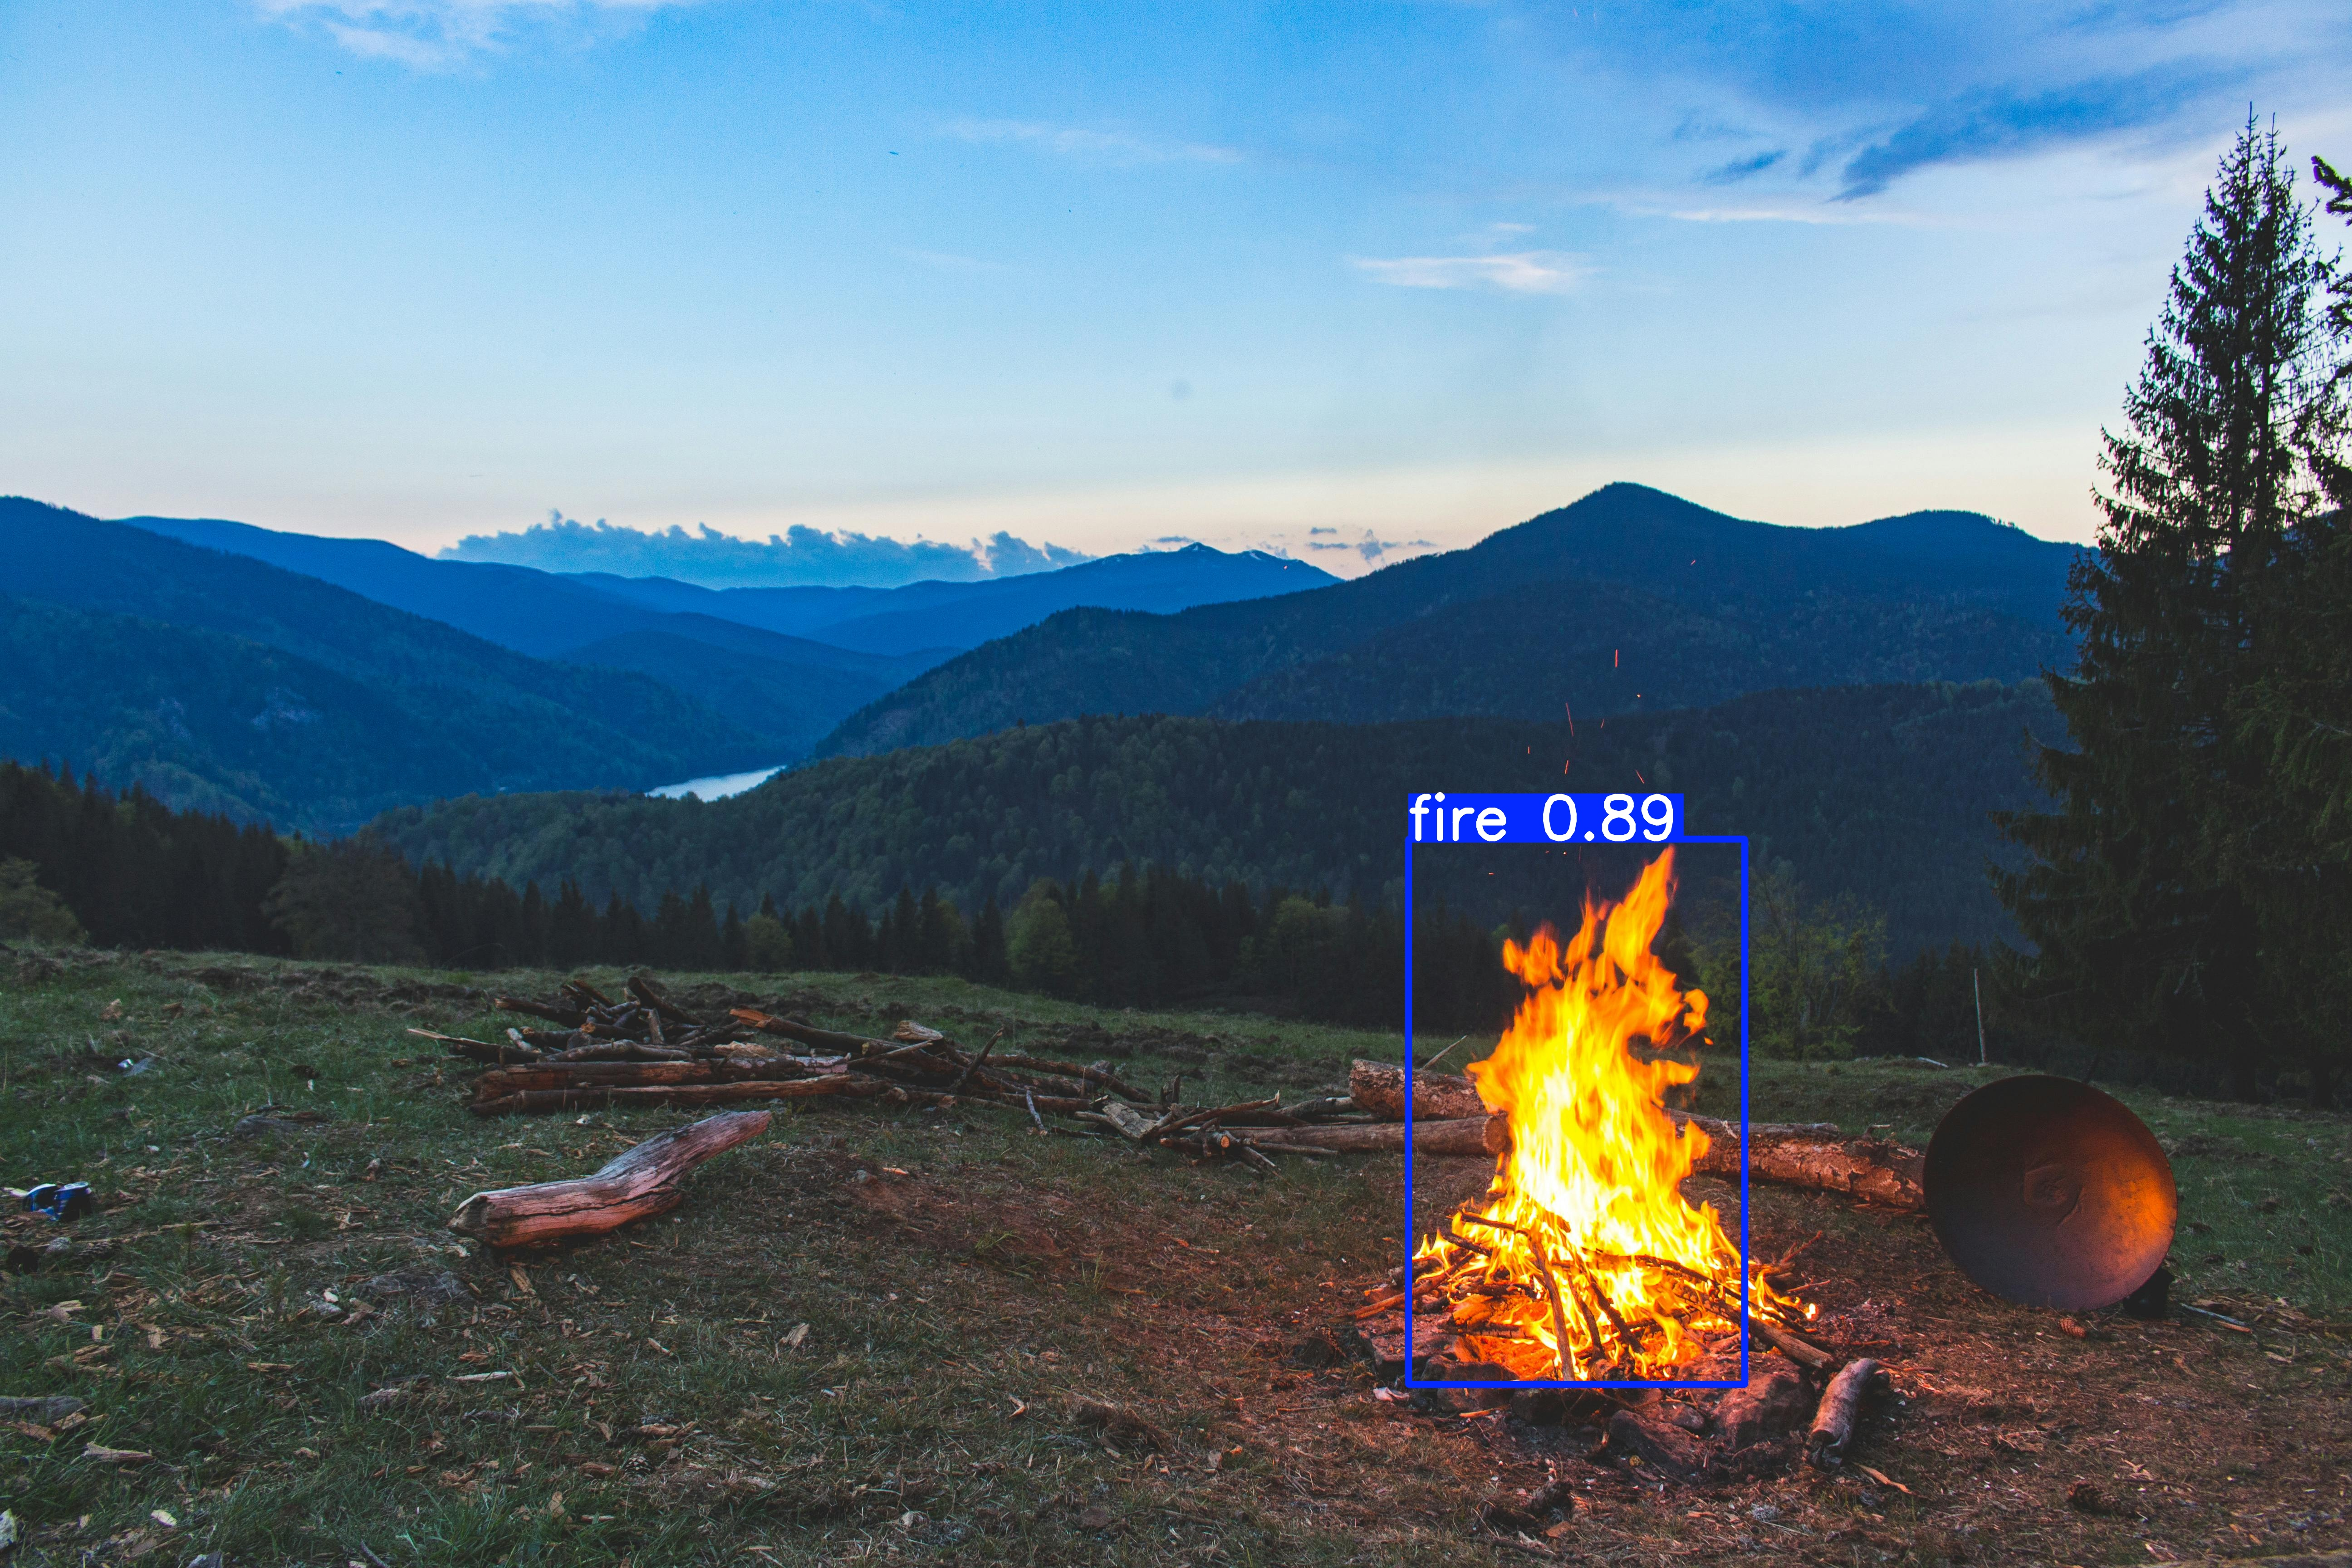

Fogo detectado com confiança de 0.89


In [11]:
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files
import os

uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]

model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source=uploaded_image_path, imgsz=640, conf=0.6, save=True)

save_dir = results[0].save_dir
print("Pasta de saída dos resultados:", save_dir)

print("Arquivos gerados:", os.listdir(save_dir))

processed_image_name = os.listdir(save_dir)[0]
processed_image_path = os.path.join(save_dir, processed_image_name)

if os.path.exists(processed_image_path):
    display(Image(filename=processed_image_path, width=400))
else:
    print("Imagem processada não encontrada:", processed_image_path)

if len(results[0].boxes) > 0:
    detected_class = results[0].boxes.cls[0].item()
    confidence = results[0].boxes.conf[0].item()

    if detected_class == 0 and confidence >= 0.6:
        message = "Fogo detectado com confiança de {:.2f}".format(confidence)
    else:
        message = "Fogo não detectado"
else:
    message = "Nenhuma detecção realizada"

print(message)